# Shape Files dos biomas

http://terrabrasilis.dpi.inpe.br/downloads/


# 1 - Dados de Biomas

In [1]:
##########################
# imports
from datetime import datetime
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import pandas as pd
import geopandas as gpd
import geojson
import folium
from folium.plugins import HeatMap, HeatMapWithTime, MarkerCluster
from shapely.geometry import Point, Polygon
import geobr
import warnings
warnings.filterwarnings("ignore")

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [ ]:
#pip install geojson

In [ ]:
##########################
# Carregar biomas do cadastro do geobr

# Carga
biomas = geobr.read_biomes(year = 2019, simplified = True)


In [ ]:
##########################
# Carregar biomas do cadastro do geobr
biomas

In [ ]:
##########################
# criar o mapa base

my_map = folium.Map(
                location=(
                           -15.793836, -47.882721
                        ),
                zoom_start=4)
            

In [ ]:
##########################
# Carregar os biomas no Mapa

# transformar geometria em json
geoPath = biomas.geometry.to_json()

# Amazônis
biomas_tmp = biomas[(biomas['name_biome']=='Amazônia')]
geoPath = biomas_tmp.geometry.to_json()
folium.GeoJson(geoPath, style_function=lambda x, color='green': {'color': 'green', 'weight': 0.5,'fillOpacity': 0.25}).add_to(my_map)

# Caatinga
biomas_tmp = biomas[(biomas['name_biome']=='Caatinga')]
geoPath = biomas_tmp.geometry.to_json()
folium.GeoJson(geoPath, style_function=lambda x, color='yellow': {'color': 'yellow', 'weight': 0.5,'fillOpacity': 0.25}).add_to(my_map)

# Cerrado
biomas_tmp = biomas[(biomas['name_biome']=='Cerrado')]
geoPath = biomas_tmp.geometry.to_json()
folium.GeoJson(geoPath, style_function=lambda x, color='Peru': {'color': 'Peru', 'weight': 0.5,'fillOpacity': 0.25}).add_to(my_map)

# Mata Atlântica
biomas_tmp = biomas[(biomas['name_biome']=='Mata Atlântica')]
geoPath = biomas_tmp.geometry.to_json()
folium.GeoJson(geoPath, style_function=lambda x, color='LawnGreen': {'color': 'LawnGreen', 'weight': 0.5,'fillOpacity': 0.25}).add_to(my_map)

# Pampa
biomas_tmp = biomas[(biomas['name_biome']=='Pampa')]
geoPath = biomas_tmp.geometry.to_json()
folium.GeoJson(geoPath, style_function=lambda x, color='DeepSkyBlue': {'color': 'DeepSkyBlue', 'weight': 0.5,'fillOpacity': 0.25}).add_to(my_map)

# Pantanal
biomas_tmp = biomas[(biomas['name_biome']=='Pantanal')]
geoPath = biomas_tmp.geometry.to_json()
folium.GeoJson(geoPath, style_function=lambda x, color='MediumPurple': {'color': 'MediumPurple', 'weight': 0.5,'fillOpacity': 0.25}).add_to(my_map)

#Sistema Costeiro
#biomas_tmp = biomas[(biomas['name_biome']=='Sistema Costeiro')]
#geoPath = biomas_tmp.geometry.to_json()
#folium.GeoJson(geoPath, style_function=lambda x, color='blue': {'color': 'blue', 'weight': 0.5,'fillOpacity': 0.25}).add_to(my_map)




In [ ]:
##########################
# Resultado da carga dos polígonos dos biomas
df_mapa = biomas


# 2 - Dados de Estações

In [ ]:
##########################
# Carregar os dados de estações

##########################
# Dados das estações de  meteorológica de chuvas
localizacoes = pd.read_csv('./dados/my_estacoes_202212061839.csv', sep=',')

#EstacoesChuvas_202301281647.csv


In [ ]:
##########################
# Total de registros carregados
print('Total de registros de estações carregados = ', len(localizacoes))


In [ ]:
##########################
# Array com os pontos de localização latitude e longitude

# inicializando array
pontos_geometricos = []
for xy in zip(localizacoes['Longitude'], localizacoes['Latitude']):
    # carregar coordenadas no no array
    pontos_geometricos.append(Point(xy))

In [ ]:
##########################
# formata dados de localização para processo de identificação dos pontos no polígono

# Formatação dos pontos
localizacoes_geo = gpd.GeoDataFrame(localizacoes,
                                    crs = {'init': 'epsg:4326'},
                                    geometry = pontos_geometricos)

# Imprimir a quantidade de registros
print('Total de registros com geometry = ', len(localizacoes_geo))

In [ ]:
##########################
# Funções e procedimentos auxiliares

# resto da divisão
def restodiv(n1, n2):
    return (n1 % n2)

In [ ]:
##########################
# Validar pontos geográficos nos biomas

# iniciar variável que vai guardar a informação do bioma que a estação pretence
localizacoes_geo["pertence_ao_bioma"] = ""

# Varrer pontos e classificar biomas
for i in range(0, len(localizacoes_geo)):
    ponto = localizacoes_geo.geometry.loc[i]
    check = biomas.contains(ponto).values
    cont = 0
    bioma = ""
    for x in (check):
        if (x == True) and (cont == 0):
            bioma = 'Amazonia'
        elif (x == True) and (cont == 1):
            bioma = 'Cerrado'
        elif (x == True) and (cont == 2):
            bioma = 'Caatinga'
        elif (x == True) and (cont == 3):
            bioma = 'Mata Atlantica'
        elif (x == True) and (cont == 4):
            bioma = 'Pantanal'
        elif (x == True) and (cont == 5):
            bioma = 'Pampa'
        cont = cont + 1
        
    # Atualiza informação    
    localizacoes_geo["pertence_ao_bioma"].loc[i] = bioma
    
    # verificar para imprimir progresso do processamento
    if (restodiv(i, 500) == 0) and (i > 0):
        print('Data = ', datetime.now(), 'Quantidade de Registros = ', i)


In [ ]:
##########################
# Plotar biomas no mapa

pontos = localizacoes_geo[['Latitude', 'Longitude']].values.tolist()


marker_cluster = MarkerCluster().add_to(my_map)
for point in pontos:
    
    folium.Marker(
            location=[point[0], point[1]],
            #popup= 'testes',
            icon=folium.Icon(color="green", icon="ok-sign"),
            ).add_to(marker_cluster)

my_map


In [ ]:
##########################
# Imprimir quantidade de estações por bioma

# resumo
localizacoes_geo.groupby('pertence_ao_bioma').agg({'RegistroID': 'count'})


In [ ]:
##########################
# Gravar arquivo de estações com dados de bioma

localizacoes_geo.to_csv('./dados/estacoes_bioma.csv', sep=';', encoding='utf-8', index=False)
del localizacoes_geo


# 3 - Dados de chuvas

In [2]:
##########################
# Carregar arquivo de registro de chuvas
#df_chuvas = pd.read_csv('./dados/vw_HIDRO_CHUVA_MEDICOES_202212071151.csv', sep=',', encoding='utf-8')
df_chuvas = pd.read_csv('./dados/vw_HIDRO_CHUVA_MEDICOES_202301251212.csv', sep=',', encoding='utf-8')

localizacoes_geo = pd.read_csv('./dados/estacoes_bioma.csv', sep=';', encoding='utf-8')


In [3]:
##########################
# Imprimir tamanhos de dataframe

print('Tamanho do dataframe df_chuvas = ',len(df_chuvas))

Tamanho do dataframe df_chuvas =  626954


In [4]:
##########################
# Criar um dataframe com chaves + colunas chuvas

rain = df_chuvas[['RegistroID',
                  'Importado',
                  'Temporario',
                  'Removido',
                  'ImportadoRepetido',
                  'EST_ID',
                  'NivelConsistencia',
                  'ANO',
                  'MES',
                  'TipoMedicaoChuvas',
                  'Maxima',
                  'Total',
                  'DiaMaxima',
                  'NumDiasDeChuva',
                  'MaximaStatus',
                  'TotalStatus',
                  'NumDiasDeChuvaStatus',
                  'TotalAnual',
                  'TotalAnualStatus',
                  'DataIns',
                  'DataAlt',
                  'RespAlt',
                  'Chuva01',
                  'Chuva02',
                  'Chuva03',
                  'Chuva04',
                  'Chuva05',
                  'Chuva06',
                  'Chuva07',
                  'Chuva08',
                  'Chuva09',
                  'Chuva10',
                  'Chuva11',
                  'Chuva12',
                  'Chuva13',
                  'Chuva14',
                  'Chuva15',
                  'Chuva16',
                  'Chuva17',
                  'Chuva18',
                  'Chuva19',
                  'Chuva20',
                  'Chuva21',
                  'Chuva22',
                  'Chuva23',
                  'Chuva24',
                  'Chuva25',
                  'Chuva26',
                  'Chuva27',
                  'Chuva28',
                  'Chuva29',
                  'Chuva30',
                  'Chuva31',
                  'Chuva01Status',
                  'Chuva02Status',
                  'Chuva03Status',
                  'Chuva04Status',
                  'Chuva05Status',
                  'Chuva06Status',
                  'Chuva07Status',
                  'Chuva08Status',
                  'Chuva09Status',
                  'Chuva10Status',
                  'Chuva11Status',
                  'Chuva12Status',
                  'Chuva13Status',
                  'Chuva14Status',
                  'Chuva15Status',
                  'Chuva16Status',
                  'Chuva17Status',
                  'Chuva18Status',
                  'Chuva19Status',
                  'Chuva20Status',
                  'Chuva21Status',
                  'Chuva22Status',
                  'Chuva23Status',
                  'Chuva24Status',
                  'Chuva25Status',
                  'Chuva26Status',
                  'Chuva27Status',
                  'Chuva28Status',
                  'Chuva29Status',
                  'Chuva30Status',
                  'Chuva31Status']].copy()

In [5]:
##########################
# passo 1 -> criar sub dataframe com os dias do mês
raintmp = rain[[  'RegistroID',
                  'Importado',
                  'Temporario',
                  'Removido',
                  'ImportadoRepetido',
                  'EST_ID',
                  'NivelConsistencia',
                  'ANO',
                  'MES',
                  'TipoMedicaoChuvas',
                  'Maxima',
                  'Total',
                  'DiaMaxima',
                  'NumDiasDeChuva',
                  'MaximaStatus',
                  'TotalStatus',
                  'NumDiasDeChuvaStatus',
                  'TotalAnual',
                  'TotalAnualStatus',
                  'DataIns',
                  'DataAlt',
                  'RespAlt',
                  'Chuva01',
                  'Chuva01Status']]
                    

# passo 2 -> adidionar campo dia com valor i + 1
raintmp['dia'] = 1
    
# Criar renomear campo de chuvas para chuva
raintmp.rename(columns = {'01':'chuva', 'Chuva01Status':'status'}, inplace = True)

# Criar Data Frame vazio
df_rain = raintmp.query('ANO >= 10000')

print('Tamanho do Dataframe df_rain = ', len(df_rain))

Tamanho do Dataframe df_rain =  0


In [6]:
##########################
# Transformação das colunas de Chuvas em linhas


# Loop para gerar Data Frame com os dias em linhas, não em colunas
for i in range(31):
    # passo 1 -> criar sub dataframe com os dias do mês
    raintmp = rain[[  'RegistroID',
                      'Importado',
                      'Temporario',
                      'Removido',
                      'ImportadoRepetido',
                      'EST_ID',
                      'NivelConsistencia',
                      'ANO',
                      'MES',
                      'TipoMedicaoChuvas',
                      'Maxima',
                      'Total',
                      'DiaMaxima',
                      'NumDiasDeChuva',
                      'MaximaStatus',
                      'TotalStatus',
                      'NumDiasDeChuvaStatus',
                      'TotalAnual',
                      'TotalAnualStatus',
                      'DataIns',
                      'DataAlt',
                      'RespAlt',
                      f'Chuva{i+1:02}',
                      f'Chuva{i+1:02}Status']]
                    

    # passo 2 -> adidionar campo dia com valor i + 1
    raintmp['dia'] = i + 1
#    raintmp[f'Chuva{i+1:02}Status'] = i + 1
    
    # Criar renomear campo de chuvas para chuva
    raintmp.rename(columns = {f'Chuva{i+1:02}':'chuva', f'Chuva{i+1:02}Status':'status'}, inplace = True)

    df_rain = pd.concat([raintmp, df_rain])
    print('Tamanho do Dataframe df_rain = ', len(df_rain))
    


Tamanho do Dataframe df_rain =  626954
Tamanho do Dataframe df_rain =  1253908
Tamanho do Dataframe df_rain =  1880862
Tamanho do Dataframe df_rain =  2507816
Tamanho do Dataframe df_rain =  3134770
Tamanho do Dataframe df_rain =  3761724
Tamanho do Dataframe df_rain =  4388678
Tamanho do Dataframe df_rain =  5015632
Tamanho do Dataframe df_rain =  5642586
Tamanho do Dataframe df_rain =  6269540
Tamanho do Dataframe df_rain =  6896494
Tamanho do Dataframe df_rain =  7523448
Tamanho do Dataframe df_rain =  8150402
Tamanho do Dataframe df_rain =  8777356
Tamanho do Dataframe df_rain =  9404310
Tamanho do Dataframe df_rain =  10031264
Tamanho do Dataframe df_rain =  10658218
Tamanho do Dataframe df_rain =  11285172
Tamanho do Dataframe df_rain =  11912126
Tamanho do Dataframe df_rain =  12539080
Tamanho do Dataframe df_rain =  13166034
Tamanho do Dataframe df_rain =  13792988
Tamanho do Dataframe df_rain =  14419942
Tamanho do Dataframe df_rain =  15046896
Tamanho do Dataframe df_rain =  

In [7]:
del rain

In [8]:
##########################
# Merge dos dataframes status e chuvas

# juntar chuvas e status
#dfchuvas = pd.merge(df_rain, df_status)

dfchuvas = df_rain.copy()
del df_rain

In [9]:
dfchuvas

,RegistroID,Importado,Temporario,Removido,ImportadoRepetido,EST_ID,NivelConsistencia,ANO,MES,TipoMedicaoChuvas,...,NumDiasDeChuvaStatus,TotalAnual,TotalAnualStatus,DataIns,DataAlt,RespAlt,chuva,status,dia,Chuva01
0,40662067,0,0,0,0,1847003,1,2010,2,1.0,...,1.0,NaN,0.0,2010-07-19 00:00:00.000,NaN,6.0,NaN,0.0,31,NaN
1,40662073,0,0,0,0,1848004,1,2010,2,1.0,...,1.0,NaN,0.0,2010-07-19 00:00:00.000,2015-05-20 00:00:00.000,6.0,NaN,0.0,31,NaN
2,40662080,0,0,0,0,1946004,1,2010,2,1.0,...,1.0,NaN,0.0,2010-07-19 00:00:00.000,NaN,6.0,NaN,0.0,31,NaN
3,40662096,0,0,0,0,1947026,1,2010,1,1.0,...,1.0,NaN,0.0,2010-07-19 00:00:00.000,NaN,6.0,0.0,1.0,31,NaN
4,40662117,0,0,0,0,2045026,1,2010,2,1.0,...,1.0,NaN,0.0,2010-07-19 00:00:00.000,NaN,6.0,NaN,0.0,31,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
626949,47318034,0,0,0,0,1541010,1,2012,10,1.0,...,1.0,NaN,0.0,2013-04-09 00:00:00.000,2013-04-16 00:00:00.000,6.0,0.0,1.0,1,NaN
626950,47319214,0,0,0,0,1049001,1,2013,1,1.0,...,1.0,NaN,0.0,2013-04-09 00:00:00.000,2013-04-15 00:00:00.000,6.0,12.8,1.0,1,NaN
626951,47319258,0,0,0,0,1348003,1,2013,1,1.0,...,1.0,NaN,0.0,2013-04-09 00:00:00.000,2013-04-15 00:00:00.000,6.0,0.0,1.0,1,NaN
626952,47319320,0,0,0,0,1750000,1,2013,1,1.0,...,1.0,NaN,0.0,2013-04-09 00:00:00.000,2013-04-16 00:00:00.000,6.0,0.0,1.0,1,NaN


In [10]:
##########################
# Retirar os dias que não fazem parte do mês (exemplo 31/11)

# selecionar os índices desejados
filtro = dfchuvas['status'] == 1.0

print('Antes da limpeza do status.... ', len(dfchuvas))
# filtrar somente os desejados
dfchuvas = dfchuvas[filtro]
print('Após limpeza do status.... ', len(dfchuvas))

# selecionar os índices desejados
filtro = dfchuvas['chuva'] >= 0.0

print('Antes da limpeza de chuva negativa.... ', len(dfchuvas))
# filtrar somente os desejados
dfchuvas = dfchuvas[filtro]
print('Após limpeza de chuva negativa.... ', len(dfchuvas))

Antes da limpeza do status....  19435574
Após limpeza do status....  16350391
Antes da limpeza de chuva negativa....  16350391
Após limpeza de chuva negativa....  16335287


In [11]:


dfchuvas['dt_medicao_chuva'] = pd.to_datetime( dfchuvas['ANO'].astype('string') + \
                                                "-" + ("0" + dfchuvas['MES'].astype('string')).str[-2:] + \
                                                "-" + dfchuvas['dia'].astype('string')
                                               , format="%Y-%m-%d"
                                               , errors='coerce')


In [12]:
dfchuvas

,RegistroID,Importado,Temporario,Removido,ImportadoRepetido,EST_ID,NivelConsistencia,ANO,MES,TipoMedicaoChuvas,...,TotalAnual,TotalAnualStatus,DataIns,DataAlt,RespAlt,chuva,status,dia,Chuva01,dt_medicao_chuva
3,40662096,0,0,0,0,1947026,1,2010,1,1.0,...,NaN,0.0,2010-07-19 00:00:00.000,NaN,6.0,0.0,1.0,31,NaN,2010-01-31
11,40662262,0,0,0,0,2041018,1,2010,1,1.0,...,NaN,0.0,2010-07-19 00:00:00.000,2013-04-16 00:00:00.000,6.0,0.0,1.0,31,NaN,2010-01-31
22,40662294,0,0,0,0,1844018,1,2010,1,1.0,...,NaN,0.0,2010-07-19 00:00:00.000,2013-04-16 00:00:00.000,6.0,0.0,1.0,31,NaN,2010-01-31
32,40662215,0,0,0,0,1442031,1,2010,1,1.0,...,NaN,0.0,2010-07-19 00:00:00.000,2013-04-16 00:00:00.000,6.0,0.0,1.0,31,NaN,2010-01-31
33,40662216,0,0,0,0,1840019,1,2010,1,1.0,...,NaN,0.0,2010-07-19 00:00:00.000,2013-04-16 00:00:00.000,6.0,0.0,1.0,31,NaN,2010-01-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
626949,47318034,0,0,0,0,1541010,1,2012,10,1.0,...,NaN,0.0,2013-04-09 00:00:00.000,2013-04-16 00:00:00.000,6.0,0.0,1.0,1,NaN,2012-10-01
626950,47319214,0,0,0,0,1049001,1,2013,1,1.0,...,NaN,0.0,2013-04-09 00:00:00.000,2013-04-15 00:00:00.000,6.0,12.8,1.0,1,NaN,2013-01-01
626951,47319258,0,0,0,0,1348003,1,2013,1,1.0,...,NaN,0.0,2013-04-09 00:00:00.000,2013-04-15 00:00:00.000,6.0,0.0,1.0,1,NaN,2013-01-01
626952,47319320,0,0,0,0,1750000,1,2013,1,1.0,...,NaN,0.0,2013-04-09 00:00:00.000,2013-04-16 00:00:00.000,6.0,0.0,1.0,1,NaN,2013-01-01


In [13]:
##########################
# Renomear campos para realizar merge

# dfchuvas
dfchuvas.rename(columns = {'RegistroID':'ChuvasID', 'EST_ID':'EstacaoCodigo'}, inplace=True)

# localizacoes_geo
#localizacoes_geo['EstacaoID'] = localizacoes_geo['EstadoCodigo'].astype(int)
localizacoes_geo.rename(columns = {'Codigo':'EstacaoCodigo'}, inplace=True)

In [14]:
##########################
# merge de estações com chuvas

result = dfchuvas.merge(localizacoes_geo, how='inner', on='EstacaoCodigo')


In [15]:
len(result) #4.973.420

16335204

In [16]:
len(localizacoes_geo)

12382

In [17]:
len(dfchuvas)

16335287

In [18]:
##########################
# dataframe com campos importantes para o estudo
# --> bioma + chuvas + ano + mês

df_estudo = result[[
                     'ANO'
                    ,'MES'
                    ,'dia'
                    ,'chuva'
                    ,'EstacaoCodigo'
                    ,'BaciaCodigo'
                    ,'SubBaciaCodigo'  
                    ,'RioCodigo'
                    #,'EstadoCodigo'  
                    #,'MunicipioCodigo'   
                    #,'ResponsavelCodigo'
                    ,'TipoEstacao' 
                    #,'Nome'
                    #,'geometry'
                    ,'pertence_ao_bioma']].copy()


#df_estudo['chuva_sum'] = df_estudo['chuva']

#df_estudo['chuva_mean'] = df_estudo['chuva']

#df_estudo['chuva_count'] = df_estudo['chuva']

#df_estudo['chuva_std'] = df_estudo['chuva']

In [19]:
##########################
# Dataframes filtrados

filtro = df_estudo['pertence_ao_bioma'] != ''
# filtrar somente os desejados
df_estudo = df_estudo[filtro]

filtro_amazonia = df_estudo['pertence_ao_bioma'] == 'Amazonia'
df_amazonia = df_estudo[filtro_amazonia]

filtro_cerrado = df_estudo['pertence_ao_bioma'] == 'Cerrado'
df_cerrado = df_estudo[filtro_cerrado]

filtro_caatinga = df_estudo['pertence_ao_bioma'] == 'Caatinga'
df_caatinga = df_estudo[filtro_caatinga]

filtro_mata_atlantica = df_estudo['pertence_ao_bioma'] == 'Mata Atlantica'
df_mata_atlantica = df_estudo[filtro_mata_atlantica]

filtro_pantanal = df_estudo['pertence_ao_bioma'] == 'Pantanal'
df_pantanal = df_estudo[filtro_pantanal]

filtro_pampa = df_estudo['pertence_ao_bioma'] == 'Pampa'
df_pampa = df_estudo[filtro_pampa]

In [20]:
##########################
# Dataframes de cada bioma
#dados.head()

In [21]:
# Plot
def plotbiomames(dados, eixox, eixoy):
    # Gráficos
    plt.figure(figsize =(10, 8))
    ax = sns.boxplot(x=eixox, y=eixoy, data=dados, color='#99c2a2')
    ax = sns.stripplot(x=eixox, y=eixoy, data=dados, color='#7d0013')
    ax = sns.lineplot(x=eixox, y=eixoy, data=dados, color='blue')
    plt.show()

def estatistica_estrato_amb(dados, estrato='pertence_ao_bioma', ano='vazio'):
    # estratos dos biomas por ano/mês
    
    # Passo para criar uma nova coluna para agregação
    dados['chuva_soma'] =  dados['chuva']
    
    # pegar a média de chuva e a soma de chuva por estação --> o resultado é que no mês, uma estação teve uma média diária e um total de chuvas registrados
    df_estrato1 = dados.groupby(['ANO','MES','EstacaoCodigo','pertence_ao_bioma']).agg({'chuva':'mean', 'chuva_soma':'sum'})
    
    # reset do index
    df_estrato1.reset_index(inplace = True)
    
    # cria coluna quantidade para registrar que se trata de uma estação somente
    df_estrato1['quantidade'] = 1
    # coluna para registro de variância da estação
    df_estrato1['variancia'] = df_estrato1['chuva']
    # coluna para registro do desvio padrão da estação
    df_estrato1['desvio_padrao'] = df_estrato1['chuva']
    
    # estrato por ANO, MES e BIOMA - calcular média das chuvas por ano, mês e bioma 
    # observação: Nesta agregação, estamos somando a quantidade de estações para conhecermos quantas estações registrara
    df_estrato1 = df_estrato1.groupby(['ANO','MES','pertence_ao_bioma']).agg({'chuva':'mean', 'chuva_soma':'sum', 'quantidade':'sum','variancia':'var','desvio_padrao':'std'})
    # reset_index()
    df_estrato1.reset_index(inplace = True)
    
    
    # estrato por ANO e BIOMA --> A quantidade média
    df_estrato2 = df_estrato1.groupby(['ANO','pertence_ao_bioma']).agg({'chuva':'mean', 'chuva_soma':'sum', 'quantidade':'mean','variancia':'var','desvio_padrao':'std'})
    df_estrato2['quantidade'] = (round(df_estrato2['quantidade'],0)).astype('int')
    df_estrato2.reset_index(inplace = True)

    
    # Por ANO --> a quantidade SOMA
    df_estrato3 = df_estrato2.groupby(['ANO']).agg({'chuva':'mean', 'chuva_soma':'sum', 'quantidade':'sum','variancia':'var','desvio_padrao':'std'})
    df_estrato3['quantidade'] = (round(df_estrato3['quantidade'],0)).astype('int')
    df_estrato3.reset_index(inplace = True)
    
    return df_estrato1, df_estrato2, df_estrato3
    
    


In [22]:
# Estatística por estrato
retorno1, retorno2, retorno3 = estatistica_estrato_amb(df_estudo)

In [23]:
retorno3

,ANO,chuva,chuva_soma,quantidade,variancia,desvio_padrao
0,2010,3.616649,5.751226e+06,3929,2.453086e+03,0.345848
1,2011,4.118199,7.111857e+06,3969,1.738588e+14,15.197421
2,2012,3.358598,5.299836e+06,3953,3.220785e+03,0.276645
3,2013,3.913502,5.825057e+06,3738,3.245717e+09,3.905263
4,2014,3.803694,5.322793e+06,3862,1.489391e+04,0.476716
5,2015,3.927412,5.661991e+06,3645,4.342769e+14,19.960463
6,2016,3.585046,4.638805e+06,3238,2.392292e+10,5.606004
7,2017,4.055536,5.952258e+06,3483,2.584251e+12,11.331008
8,2018,4.247603,7.130326e+06,3789,1.555917e+12,8.123017
9,2019,4.095290,6.717309e+06,3695,1.149282e+12,7.460989


In [24]:
# Estatística por ANO, MES, BIOMA
retorno1.head(20)

,ANO,MES,pertence_ao_bioma,chuva,chuva_soma,quantidade,variancia,desvio_padrao
0,2010,1,Amazonia,8.431612,141896.6900,555,24.455853,4.945286
1,2010,1,Caatinga,7.177848,194257.2400,852,13.313720,3.648797
2,2010,1,Cerrado,2.768172,40133.7000,474,3.353790,1.831336
3,2010,1,Mata Atlantica,7.897501,482697.0904,1920,26.522392,5.149989
4,2010,1,Pampa,5.637533,5927.7000,34,4.412600,2.100619
5,2010,1,Pantanal,8.292290,12653.9740,48,23.336504,4.830787
6,2010,2,Amazonia,7.717270,118502.7800,560,16.750057,4.092683
7,2010,2,Caatinga,5.009422,121131.3800,850,10.158057,3.187171
8,2010,2,Cerrado,1.553649,20582.9300,473,1.385732,1.177171
9,2010,2,Mata Atlantica,4.927703,267817.0846,1917,24.534019,4.953183


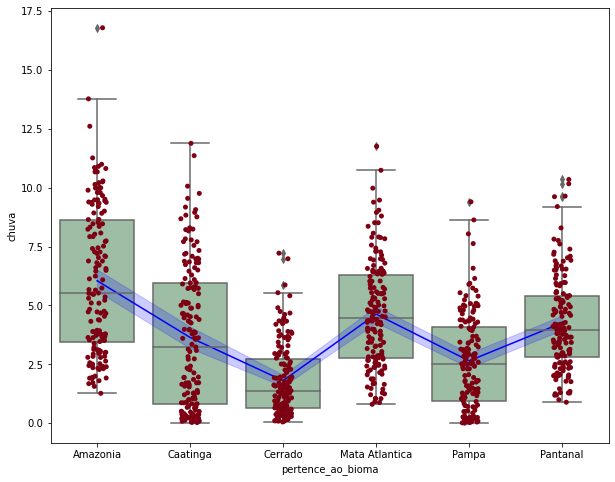

In [25]:
# Gráfico de média de chuvas por ANO, MES, BIOMA
plotbiomames(retorno1,"pertence_ao_bioma",'chuva')

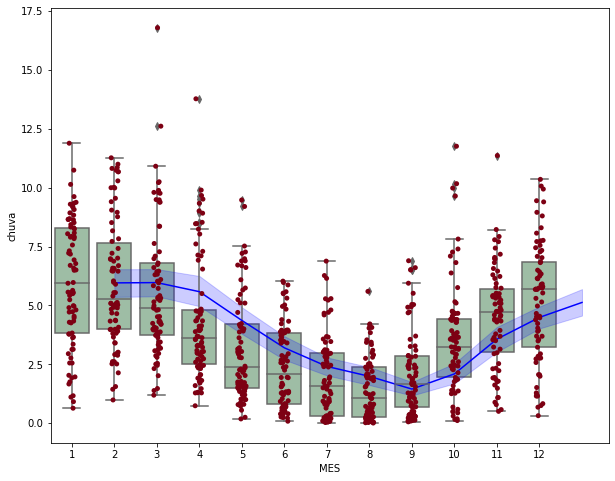

In [26]:

# Média de chuvas por ANO, MES, dia, Todos os biomas
plotbiomames(retorno1,"MES",'chuva')

In [ ]:
# Estatística por ANO, BIOMA
retorno2.head(60)

In [ ]:
# Gráfico de média de chuvas por ANO, BIOMA
plotbiomames(retorno2,"pertence_ao_bioma",'chuva')

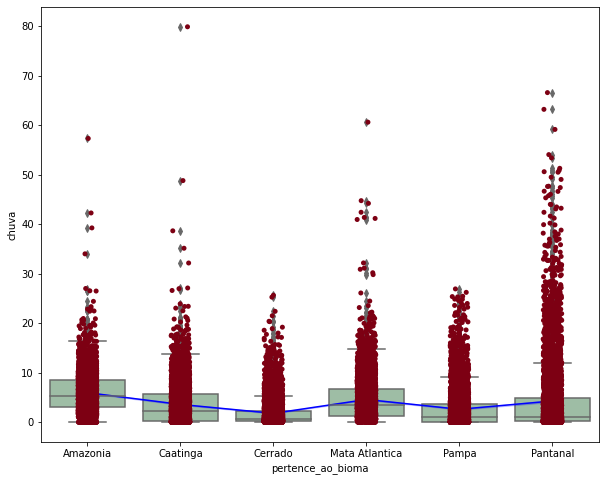

In [27]:
# Média de chuvas por ANO, MES, dia, BIOMA
xx2 = df_estudo.groupby(['ANO','MES','dia','pertence_ao_bioma']).agg({'chuva':'mean'})
xx2.reset_index(inplace = True)
plotbiomames(xx2,"pertence_ao_bioma",'chuva')

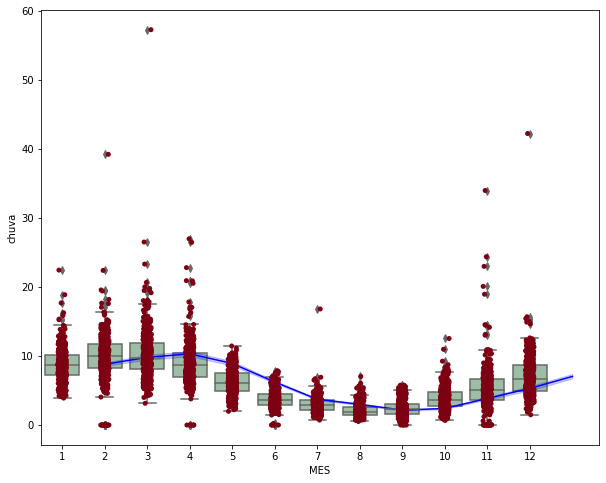

In [28]:
agg_amazonia = df_amazonia.groupby(['ANO','MES','dia','pertence_ao_bioma']).agg({'chuva':'mean'})
agg_amazonia.reset_index(inplace = True)
plotbiomames(agg_amazonia,"MES",'chuva')
#agg_amazonia.info()

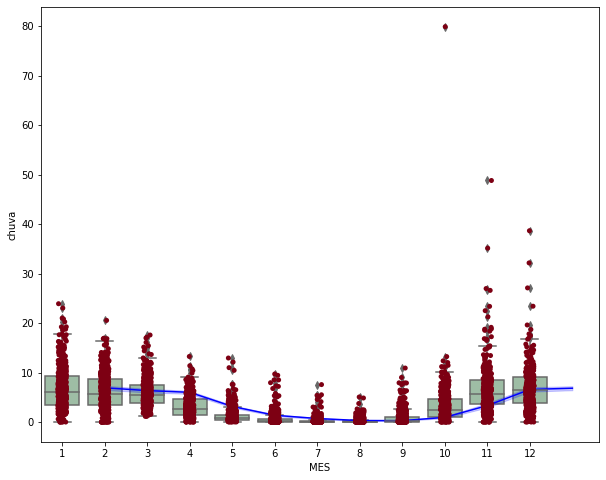

In [29]:
agg_caatinga = df_caatinga.groupby(['ANO','MES','dia','pertence_ao_bioma']).agg({'chuva':'mean'})
agg_caatinga.reset_index(inplace = True)
plotbiomames(agg_caatinga,"MES",'chuva')


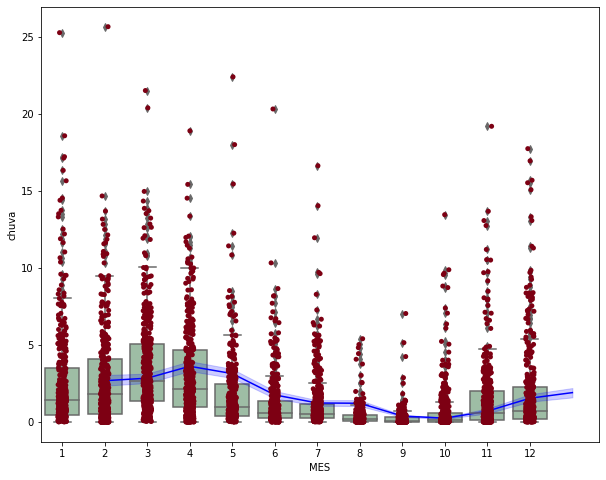

In [30]:
agg_cerrado = df_cerrado.groupby(['ANO','MES','dia','pertence_ao_bioma']).agg({'chuva':'mean'})
agg_cerrado.reset_index(inplace = True)
plotbiomames(agg_cerrado,"MES",'chuva')


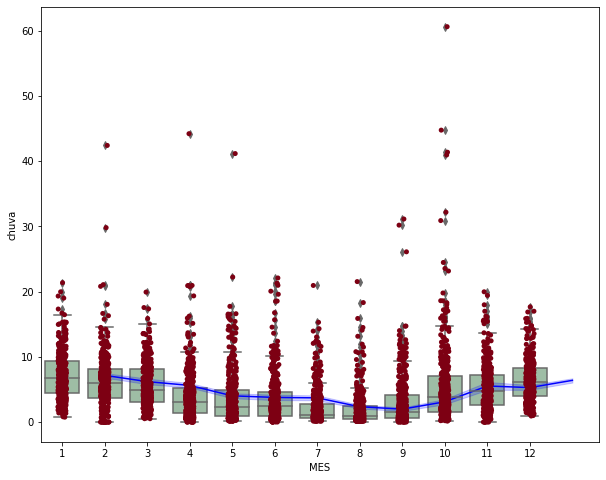

In [31]:
agg_mata_atlantica = df_mata_atlantica.groupby(['ANO','MES','dia','pertence_ao_bioma']).agg({'chuva':'mean'})
agg_mata_atlantica.reset_index(inplace = True)
plotbiomames(agg_mata_atlantica,"MES",'chuva')


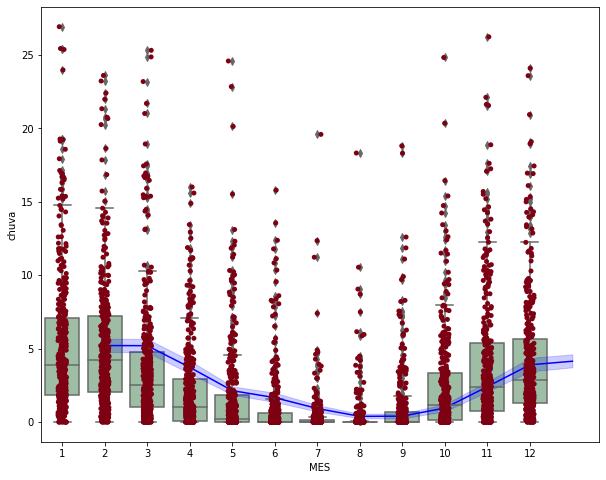

In [32]:
agg_pampa = df_pampa.groupby(['ANO','MES','dia','pertence_ao_bioma']).agg({'chuva':'mean'})
agg_pampa.reset_index(inplace = True)
plotbiomames(agg_pampa,"MES",'chuva')

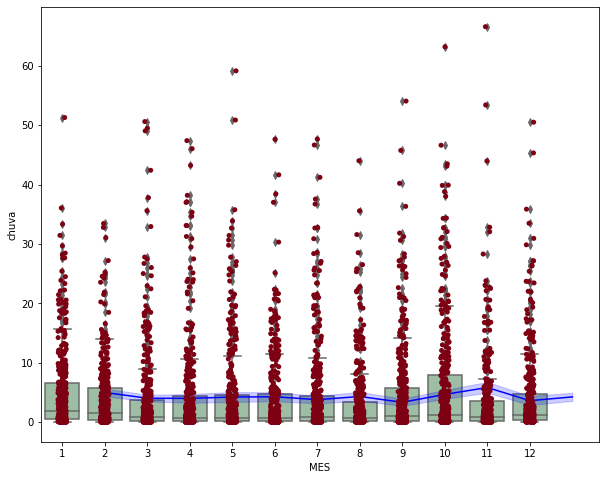

In [33]:
agg_pantanal = df_pantanal.groupby(['ANO','MES','dia','pertence_ao_bioma']).agg({'chuva':'mean'})
agg_pantanal.reset_index(inplace = True)
plotbiomames(agg_pantanal,"MES",'chuva')


# 4 - Desenvolvimento do Trabalho

### SEGUIR ESTE EXEMPLO

O algoritimo de validação foi retirado deste exemplo

https://egmara-santos.medium.com/utilizando-python-para-verificar-coordenadas-geogr%C3%A1ficas-em-um-mapa-kml-c4d61541e5ce